<a href="https://colab.research.google.com/github/F1roz/quantum_clip/blob/main/final_quantum_clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.9 MB/s eta 0:00:00


In [ ]:
pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 13.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [ ]:
!pip install scikit-learn --upgrade

100%|██████████| 560k/560k [00:00<00:00, 746kB/s] 


Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Training samples: 546
Test samples: 156
Image shape: (546, 28, 28)
Labels shape: (546, 1)


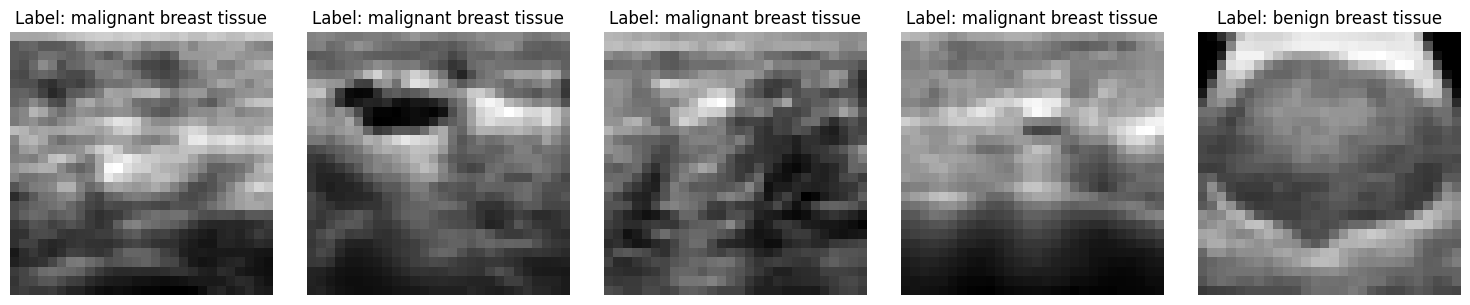


First few labels: [1 1 1 1 0 1 1 1 0 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from medmnist import BreastMNIST
import torch
from torchvision import transforms

# Load the dataset
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load train dataset
train_dataset = BreastMNIST(split='train', transform=data_transform, download=True)
test_dataset = BreastMNIST(split='test', transform=data_transform, download=True)

# Print dataset info
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset.imgs.shape}")
print(f"Labels shape: {train_dataset.labels.shape}")

# Define captions for visualization
captions = {
    0: "benign breast tissue",
    1: "malignant breast tissue"
}

# Visualize some samples
def show_samples(dataset, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        image, label = dataset[i]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Label: {captions[label.item()]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show samples
show_samples(train_dataset)

# Print first few labels
print("\nFirst few labels:", train_dataset.labels[:10].squeeze())

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
import pennylane as qml
import numpy as np
from medmnist import BreastMNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics
import os
from PIL import Image
import seaborn as sns
from typing import List, Dict, Tuple
import logging
from sklearn.model_selection import KFold
from sklearn.utils import resample
import copy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Global configurations
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

class TorchQuantumCircuit(nn.Module):

    def __init__(self, n_qubits: int, n_layers: int = 1):
        super().__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers

        # Trainable parameters for rotation gates
        self.weights = nn.Parameter(torch.randn(n_layers, n_qubits, 3))

        # Define quantum device and circuit
        self.dev = qml.device("default.qubit", wires=n_qubits)

        @qml.qnode(self.dev, interface="torch", diff_method="parameter-shift")
        def quantum_circuit(inputs, weights):
            # State preparation
            for i in range(self.n_qubits):
                qml.RY(inputs[i], wires=i)

            # Trainable layers
            for layer in range(self.n_layers):
                # Rotation gates
                for i in range(self.n_qubits):
                    qml.RX(weights[layer, i, 0], wires=i)
                    qml.RY(weights[layer, i, 1], wires=i)
                    qml.RZ(weights[layer, i, 2], wires=i)

                # Entanglement
                for i in range(self.n_qubits - 1):
                    qml.CNOT(wires=[i, i + 1])

            # Measurements
            return [qml.expval(qml.PauliZ(i)) for i in range(self.n_qubits)]

        self.quantum_circuit = quantum_circuit

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        batch_size = x.shape[0]
        device = x.device

        # Process each input in the batch
        results = []
        for i in range(batch_size):
            # Move to CPU for PennyLane processing
            inputs = x[i].cpu().detach().numpy()

            # Run quantum circuit
            output = self.quantum_circuit(inputs, self.weights)
            results.append(torch.tensor(output, dtype=torch.float32))

        # Stack results and move to original device
        return torch.stack(results).to(device)

In [ ]:
#QuantumCLIP Implementation

class QuantumCLIP(nn.Module):
    def __init__(self,
                 temperature: float = 0.07,
                 n_qubits: int = 4,
                 n_layers: int = 1,
                 embedding_dim: int = 512):
        super().__init__()
        self.temperature = temperature
        self.embedding_dim = embedding_dim

        # Text encoder
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.text_encoder = BertModel.from_pretrained('bert-base-uncased')
        self.text_projection = nn.Linear(768, embedding_dim)

        # Image encoder with quantum circuit
        self.image_encoder = nn.Sequential(
            nn.Linear(28*28, 128, dtype=torch.float32),
            nn.ReLU(),
            nn.Linear(128, 64, dtype=torch.float32),
            nn.ReLU(),
            nn.Linear(64, n_qubits, dtype=torch.float32),
            nn.Tanh(),  # Normalize inputs to quantum circuit
            TorchQuantumCircuit(n_qubits=n_qubits, n_layers=n_layers),
            nn.Linear(n_qubits, embedding_dim, dtype=torch.float32)
        )


        # Temperature parameter
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / temperature))

        # Initialize weights
        self.apply(self._init_weights)

    def _init_weights(self, module):

        if isinstance(module, nn.Linear):
            torch.nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                torch.nn.init.constant_(module.bias, 0)

    def encode_text(self, text: List[str]) -> torch.Tensor:
        # Tokenize and encode text
        text_tokens = self.tokenizer(
            text,
            padding=True,
            truncation=True,
            max_length=77,
            return_tensors="pt"
        ).to(next(self.parameters()).device)

        # Get text features
        text_features = self.text_encoder(**text_tokens).last_hidden_state[:, 0, :]
        text_features = self.text_projection(text_features)

        return nn.functional.normalize(text_features, dim=-1)

    def encode_image(self, image: torch.Tensor) -> torch.Tensor:
        # Flatten and encode image
        image_features = self.image_encoder(image.view(-1, 28*28))
        return nn.functional.normalize(image_features, dim=-1)

    def forward(self, image: torch.Tensor, text: List[str]) -> Tuple[torch.Tensor, torch.Tensor]:
        # Get image and text features
        image_features = self.encode_image(image)
        text_features = self.encode_text(text)

        # Calculate similarity
        logit_scale = self.logit_scale.exp()
        logits_per_image = logit_scale * image_features @ text_features.t()
        logits_per_text = logits_per_image.t()

        return logits_per_image, logits_per_text

In [ ]:
class BreastDataset(Dataset):
    def __init__(self, split='train'):

        data = BreastMNIST(split=split, download=True)
        self.images = data.imgs
        self.labels = data.labels

        self.transform = transforms.Compose([
            transforms.ToTensor(),
        ])

        # Define detailed class descriptions for mammogram findings
        self.class_descriptions = {
            'normal': "This mammogram shows normal breast tissue with no suspicious findings or abnormalities",
            'malignant': "This mammogram shows suspicious findings indicating possible breast cancer with abnormal tissue patterns"
        }

        # Initialize lists for storing descriptions and labels
        self.descriptions = []
        self.binary_labels = []

        # Process each image's label and create corresponding description
        for label in self.labels:
            # Convert tensor to boolean (0 = normal, 1 = malignant)
            is_malignant = bool(label.item())
            # Get corresponding description
            description = self.class_descriptions['malignant' if is_malignant else 'normal']

            # Store description and label
            self.descriptions.append(description)
            self.binary_labels.append(int(is_malignant))

    def __len__(self):
        # Return total number of samples
        return len(self.images)

    def __getitem__(self, idx):
        # Get single item from dataset
        image = self.transform(self.images[idx])  # Transform image to tensor
        text = self.descriptions[idx]             # Get corresponding description
        label = self.binary_labels[idx]          # Get binary label
        return image, text, label

def calculate_similarity_metrics(logits_per_image):

    # Get batch size from input
    batch_size = logits_per_image.size(0)

    # Calculate similarity for matched pairs (diagonal elements)
    diagonal_similarities = torch.diagonal(logits_per_image)
    avg_matched_similarity = diagonal_similarities.mean().item()

    # Calculate similarity for unmatched pairs (non-diagonal elements)
    mask = ~torch.eye(batch_size, dtype=bool, device=logits_per_image.device)
    unmatched_similarities = logits_per_image[mask]
    avg_unmatched_similarity = unmatched_similarities.mean().item()

    # Return computed metrics
    return {
        'avg_matched_similarity': avg_matched_similarity,
        'avg_unmatched_similarity': avg_unmatched_similarity,
        'similarity_ratio': avg_matched_similarity / avg_unmatched_similarity
    }

def evaluate_model(model, val_loader, device):

    model.to(device) #ensuring model is on CUDA - Changed
    model.eval()


    all_preds = []
    all_labels = []
    all_similarity_metrics = []


    with torch.no_grad():
        for images, texts, labels in val_loader:

            images = images.to(device) # Move images to CUDA
            texts_list = [text for text in texts]  # Extract list of texts
            labels = labels.to(device) #changed- moved to CUDA if applicable

            # Get model predictions
            logits_per_image, _ = model(images, texts_list)

            # Convert logits to binary predictions
            preds = (logits_per_image.argmax(dim=1) == 1).cpu().numpy()
            #labels = np.array(labels)
            all_preds.extend(preds)  # Move back to CPU for metrics
            all_labels.extend(labels.cpu().numpy())

            # Calculate similarity metrics for this batch
            similarity_metrics = calculate_similarity_metrics(logits_per_image)
            all_similarity_metrics.append(similarity_metrics)

            # Store predictions and labels
            #all_preds.extend(preds)
            #all_labels.extend(labels.cpu().numpy())

    # # Calculate classification metrics
    # metrics = {
    #     'accuracy': accuracy_score(all_labels, all_preds),
    #     'precision': precision_score(all_labels, all_preds, average='binary'),
    #     'recall': recall_score(all_labels, all_preds, average='binary'),
    #     'f1': f1_score(all_labels, all_preds, average='binary')
    # }

    metrics = compute_metrics(all_preds, all_labels)
    avg_similarity_metrics = {
        'avg_matched_similarity': np.mean([m['avg_matched_similarity'] for m in all_similarity_metrics]),
        'avg_unmatched_similarity': np.mean([m['avg_unmatched_similarity'] for m in all_similarity_metrics]),
        'similarity_ratio': np.mean([m['similarity_ratio'] for m in all_similarity_metrics])
    }

    # Combine all metrics

    metrics.update(avg_similarity_metrics)
    return metrics

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(preds, labels):
    """
    Computes and returns a dictionary of classification metrics.

    Args:
        preds (list): Predicted labels.
        labels (list): True labels.

    Returns:
        dict: A dictionary containing the computed metrics.
    """

    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds, average='binary'),
        'recall': recall_score(labels, preds, average='binary'),
        'f1': f1_score(labels, preds, average='binary')
    }

    avg_similarity_metrics = {
        'avg_matched_similarity': np.mean([m['avg_matched_similarity'] for m in all_similarity_metrics]),
        'avg_unmatched_similarity': np.mean([m['avg_unmatched_similarity'] for m in all_similarity_metrics]),
        'similarity_ratio': np.mean([m['similarity_ratio'] for m in all_similarity_metrics])
    }

    # Combine all metrics
    metrics = compute_metrics(all_preds, all_labels) #changed
    metrics.update(avg_similarity_metrics)
    return metrics

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from sklearn.model_selection import ParameterGrid

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def train_quantum_clip():

    global device
    print(f"Training on {device}")

    # Hyperparameter grid
    param_grid = {
        'learning_rate': [0.001, 0.0005, 0.0001],
        'batch_size': [16, 32],
        'weight_decay': [0.01, 0.001],
        'temperature': [0.07, 0.1]
    }

    # Cross-validation setup
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True)

    # Early stopping parameters
    early_stopping_patience = 5
    best_val_loss = float('inf')
    patience_counter = 0

    # Track best model and parameters
    best_model = None
    best_params = None
    best_metrics = None
    best_overall_f1 = 0.0

    # Dataset preparation
    dataset = BreastDataset(split='train')

    criterion = nn.CrossEntropyLoss()

    for params in ParameterGrid(param_grid):
        print(f"\nTrying parameters: {params}")
        cv_metrics = []

        # Cross-validation loop
        for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
            print(f"\nFold {fold + 1}/{n_splits}")

            # Create data loaders for this fold
            train_subsampler = SubsetRandomSampler(train_idx)
            val_subsampler = SubsetRandomSampler(val_idx)

            train_loader = DataLoader(
                dataset,
                batch_size=params['batch_size'],
                sampler=train_subsampler
            )
            val_loader = DataLoader(
                dataset,
                batch_size=params['batch_size'],
                sampler=val_subsampler
            )

            # Initialize model
            model = QuantumCLIP(temperature=params['temperature']).to(device)

            # Initialize optimizer and scheduler
            optimizer = optim.Adam(
                model.parameters(),
                lr=params['learning_rate'],
                weight_decay=params['weight_decay']
            )

            # Learning rate scheduler
            scheduler = optim.lr_scheduler.ReduceLROnPlateau(
                optimizer,
                mode='min',
                factor=0.5,
                patience=2,
                verbose=True
            )

            # Training history
            history = {
                'train_loss': [],
                'val_metrics': []
            }

            # Training loop
            for epoch in range(10):  # Max epochs
                # Training phase
                model.train()
                total_loss = 0

                for batch_idx, (images, texts, _) in enumerate(train_loader):
                    images = images.to(device)

                    optimizer.zero_grad()
                    logits_per_image, logits_per_text = model(images, texts)

                    ground_truth = torch.arange(len(images)).to(device)
                    loss = (criterion(logits_per_image, ground_truth) +
                           criterion(logits_per_text, ground_truth)) / 2

                    loss.backward()
                    optimizer.step()

                    total_loss += loss.item()

                avg_loss = total_loss / len(train_loader)
                history['train_loss'].append(avg_loss)

                # Validation phase
                val_metrics = evaluate_model(model, val_loader, device)
                history['val_metrics'].append(val_metrics)

                # Learning rate scheduling
                scheduler.step(avg_loss)

                # Early stopping check
                if avg_loss < best_val_loss:
                    best_val_loss = avg_loss
                    patience_counter = 0
                else:
                    patience_counter += 1

                if patience_counter >= early_stopping_patience:
                    print("Early stopping triggered")
                    break

                print(f"Epoch {epoch}: Loss = {avg_loss:.4f}, F1 = {val_metrics['f1']:.4f}")

            # Store fold metrics
            cv_metrics.append(val_metrics)

        # Calculate average metrics across folds
        avg_metrics = {
            metric: np.mean([fold[metric] for fold in cv_metrics])
            for metric in cv_metrics[0].keys()
        }

        print("\nAverage metrics across folds:")
        for metric, value in avg_metrics.items():
            print(f"{metric}: {value:.4f}")

        # Update best model if better
        if avg_metrics['f1'] > best_overall_f1:
            best_overall_f1 = avg_metrics['f1']
            best_model = copy.deepcopy(model)
            best_params = params
            best_metrics = avg_metrics

    # Save best model and parameters
    torch.save({
        'model_state_dict': best_model.state_dict(),
        'hyperparameters': best_params,
        'metrics': best_metrics
    }, 'best_quantum_clip_model.pth')

    print("\nBest hyperparameters:", best_params)
    print("\nBest metrics:", best_metrics)

    return best_model, best_params, best_metrics

# Main execution
if __name__ == "__main__":
    best_model, best_params, best_metrics = train_quantum_clip()

    # Test evaluation
    test_dataset = BreastDataset(split='test')
    test_loader = DataLoader(test_dataset, batch_size=32)

    test_metrics = evaluate_model(best_model, test_loader, device)
    print("\nTest Results with Best Model:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value:.4f}")



Using device: cuda
Training on cuda
Using downloaded and verified file: /root/.medmnist/breastmnist.npz

Trying parameters: {'batch_size': 16, 'learning_rate': 0.001, 'temperature': 0.07, 'weight_decay': 0.01}

Fold 1/5
Epoch 0: Loss = 2.7273, F1 = 0.2963
Epoch 1: Loss = 2.7298, F1 = 0.2136
Epoch 2: Loss = 2.7247, F1 = 0.5000
Epoch 3: Loss = 2.7242, F1 = 0.3119
Epoch 4: Loss = 2.7238, F1 = 0.2020
Epoch 5: Loss = 2.7232, F1 = 0.2222
Epoch 6: Loss = 2.7231, F1 = 0.2136
Epoch 7: Loss = 2.7232, F1 = 0.0667
Epoch 8: Loss = 2.7231, F1 = 0.0000
Epoch 9: Loss = 2.7231, F1 = 0.3486

Fold 2/5
Epoch 0: Loss = 2.7437, F1 = 0.0000
Epoch 1: Loss = 2.7319, F1 = 0.3333
Epoch 2: Loss = 2.7323, F1 = 0.0000
Epoch 3: Loss = 2.7304, F1 = 0.3762
Early stopping triggered

Fold 3/5
Early stopping triggered

Fold 4/5
Early stopping triggered

Fold 5/5
Early stopping triggered

Average metrics across folds:
accuracy: 0.3700
precision: 0.7377
recall: 0.2228
f1: 0.3376
avg_matched_similarity: -0.4023
avg_unmatche

In [ ]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import torch.nn.functional as F

Model loaded successfully from best_quantum_clip_model.pth
Using downloaded and verified file: /root/.medmnist/breastmnist.npz


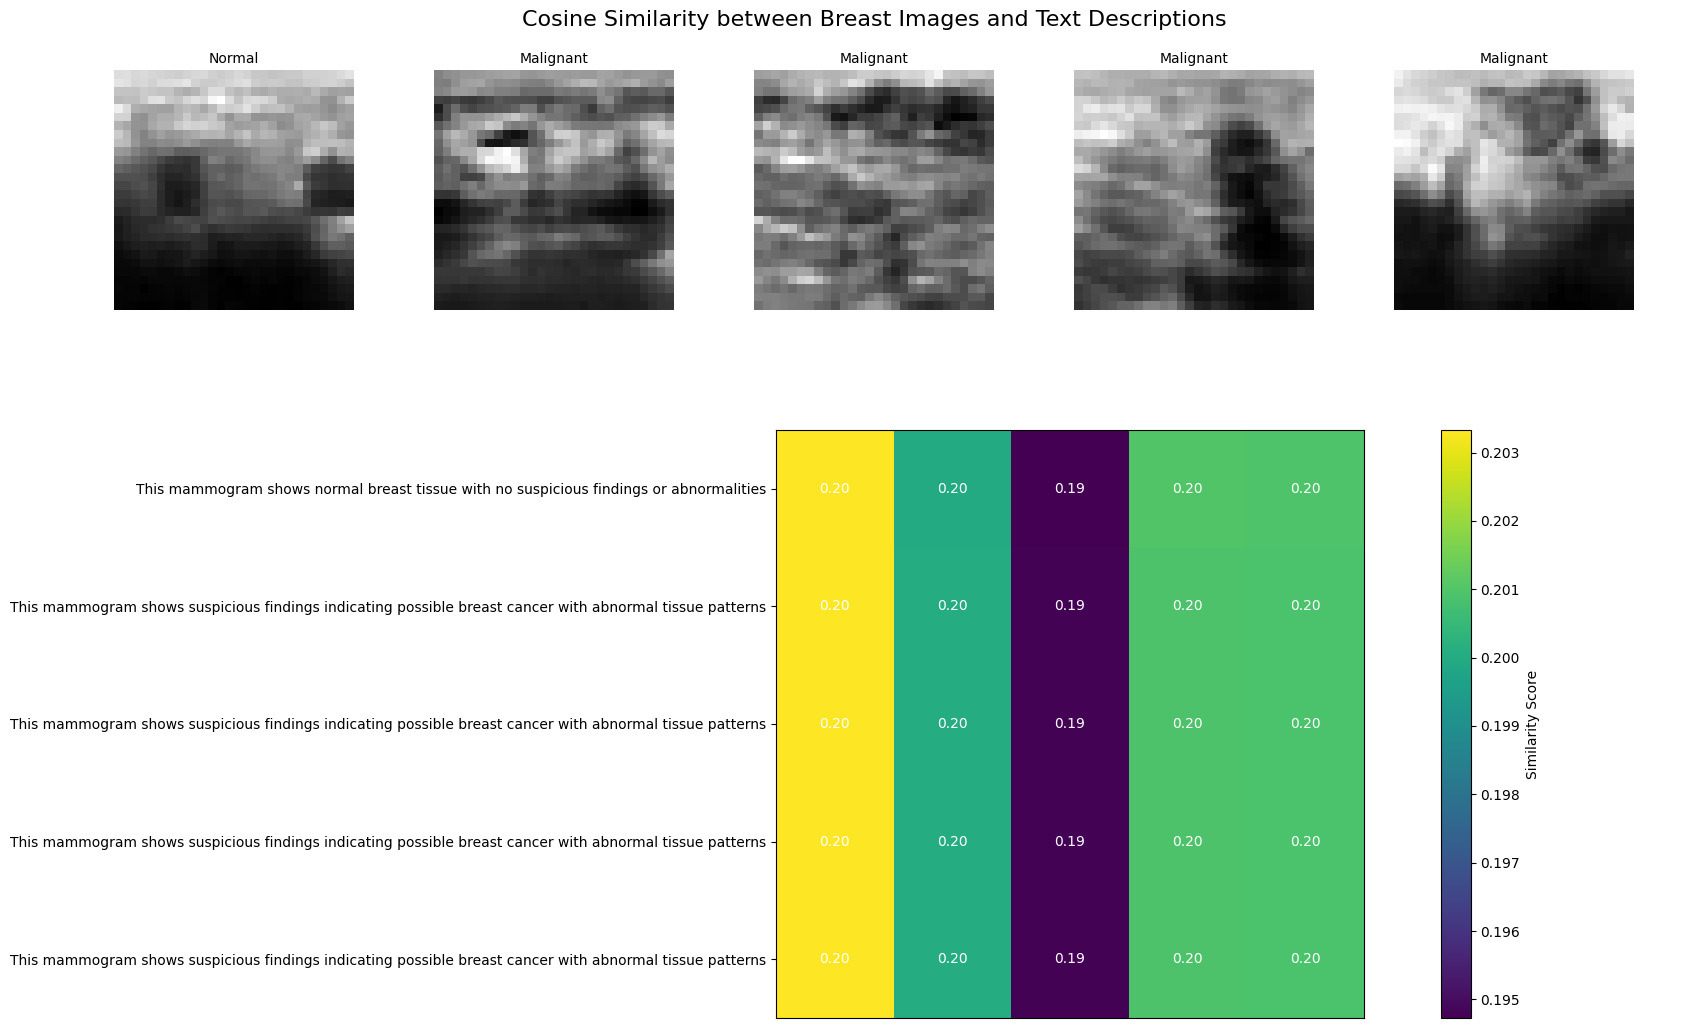


Similarity Statistics:
Average Similarity: 0.2000
Max Similarity: 0.2033
Min Similarity: 0.1947

Diagonal (matching) mean: 0.2000
Off-diagonal (non-matching) mean: 0.2000


In [ ]:
def plot_cosine_similarity():

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = QuantumCLIP().to(device)

    # Load model
    model_files = ['best_quantum_clip_model.pth', 'quantum_clip_model.pth', 'best_fine_tuned_model.pth']
    model_loaded = False

    for model_file in model_files:
        try:
            checkpoint = torch.load(model_file)
            if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
                model.load_state_dict(checkpoint['model_state_dict'])
            else:
                model.load_state_dict(checkpoint)
            print(f"Model loaded successfully from {model_file}")
            model_loaded = True
            break
        except FileNotFoundError:
            continue

    if not model_loaded:
        print("Warning: No saved model found. Using initialized model.")

    model.eval()

    # Prepare data
    test_dataset = BreastDataset(split='test')
    test_loader = DataLoader(test_dataset, batch_size=5, shuffle=True)

    # Get batch
    images, texts, labels = next(iter(test_loader))
    images = images.to(device)

    # Calculate features and similarity
    with torch.no_grad():

        temperature = 0.07

        image_features = model.image_encoder(images.view(-1, 28*28))
        text_inputs = model.tokenizer(texts, padding=True, truncation=True, return_tensors="pt").to(device)
        text_features = model.text_encoder(**text_inputs).last_hidden_state[:, 0, :]
        text_features = model.text_projection(text_features)

        # Normalize features
        image_features = F.normalize(image_features, dim=-1)
        text_features = F.normalize(text_features, dim=-1)

        # Calculate similarity with temperature scaling
        similarity = (text_features @ image_features.T) / temperature
        similarity = torch.softmax(similarity, dim=-1).cpu().numpy()

    # Create figure with custom layout
    fig = plt.figure(figsize=(20, 12))
    gs = GridSpec(2, 1, height_ratios=[0.3, 0.7], hspace=0.2)

    # Top subplot for images
    ax_top = fig.add_subplot(gs[0])
    ax_top.set_xticks([])
    ax_top.set_yticks([])
    ax_top.axis('off')

    # Display images in top row
    for idx, img in enumerate(images):
        ax_img = fig.add_axes([0.1 + idx*0.8/len(images), 0.7, 0.8/len(images), 0.2])
        ax_img.imshow(img.cpu().squeeze(), cmap='gray')
        ax_img.axis('off')
        if labels is not None:
            ax_img.set_title(f"{'Malignant' if labels[idx] else 'Normal'}",
                           pad=5, fontsize=10)

    # Bottom subplot for similarity matrix
    ax_bottom = fig.add_subplot(gs[1])
    im = ax_bottom.imshow(similarity, cmap='viridis')

    # Add text descriptions
    ax_bottom.set_yticks(range(len(texts)))
    ax_bottom.set_yticklabels(texts, fontsize=10)
    ax_bottom.set_xticks([])

    # Add similarity values
    for i in range(similarity.shape[1]):
        for j in range(similarity.shape[0]):
            ax_bottom.text(i, j, f"{similarity[j, i]:.2f}",
                         ha="center", va="center",
                         color='white' if similarity[j, i] < 0.5 else 'black',
                         fontsize=10)

    plt.colorbar(im, ax=ax_bottom, label='Similarity Score')
    plt.suptitle("Cosine Similarity between Breast Images and Text Descriptions",
                y=0.95, fontsize=16)

    # Save and show
    plt.savefig('breast_similarity_visualization.png',
                bbox_inches='tight',
                dpi=300)
    plt.show()
    plt.close()

    return similarity

# Run visualization
similarity_matrix = plot_cosine_similarity()

# Print similarity statistics
print("\nSimilarity Statistics:")
print(f"Average Similarity: {np.mean(similarity_matrix):.4f}")
print(f"Max Similarity: {np.max(similarity_matrix):.4f}")
print(f"Min Similarity: {np.min(similarity_matrix):.4f}")
print(f"\nDiagonal (matching) mean: {np.mean(np.diag(similarity_matrix)):.4f}")
off_diag_mask = ~np.eye(similarity_matrix.shape[0], dtype=bool)
print(f"Off-diagonal (non-matching) mean: {np.mean(similarity_matrix[off_diag_mask]):.4f}")

In [ ]:
def fine_tune_quantum_clip():

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the best model
    checkpoint = torch.load('best_quantum_clip_model.pth')
    model = QuantumCLIP().to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    criterion = nn.CrossEntropyLoss()
    # Fine-tuning parameters
    fine_tune_params = {
        'learning_rate': 1e-5,
        'batch_size': 16,
        'epochs': 10,
        'weight_decay': 0.0001
    }

    # Initialize datasets with smaller batch size
    train_dataset = BreastDataset(split='train')
    val_dataset = BreastDataset(split='val')

    train_loader = DataLoader(train_dataset,
                            batch_size=fine_tune_params['batch_size'],
                            shuffle=True)
    val_loader = DataLoader(val_dataset,
                          batch_size=fine_tune_params['batch_size'],
                          shuffle=False)

    # Initialize optimizer with lower learning rate
    optimizer = optim.AdamW(model.parameters(),
                          lr=fine_tune_params['learning_rate'],
                          weight_decay=fine_tune_params['weight_decay'])

    # Cosine annealing scheduler
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer,
        T_0=2,  # Restart every 2 epochs
        eta_min=1e-6
    )

    # Initialize tracking
    fine_tune_history = {
        'train_loss': [],
        'val_metrics': [],
        'learning_rates': []
    }

    best_val_f1 = 0.0
    patience = 3
    patience_counter = 0

    # Fine-tuning loop
    for epoch in range(fine_tune_params['epochs']):
        model.train()
        total_loss = 0

        for batch_idx, (images, texts, _) in enumerate(train_loader):
            images = images.to(device)

            # Forward pass
            optimizer.zero_grad()
            logits_per_image, logits_per_text = model(images, texts)

            # Calculate loss
            ground_truth = torch.arange(len(images)).to(device)
            loss = (criterion(logits_per_image, ground_truth) +
                   criterion(logits_per_text, ground_truth)) / 2

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            if batch_idx % 10 == 0:
                print(f"Fine-tuning - Epoch: {epoch}, Batch: {batch_idx}, Loss: {loss.item():.4f}")

        # Update scheduler
        scheduler.step()
        current_lr = scheduler.get_last_lr()[0]
        fine_tune_history['learning_rates'].append(current_lr)

        # Calculate average loss
        avg_loss = total_loss / len(train_loader)
        fine_tune_history['train_loss'].append(avg_loss)

        # Validation
        val_metrics = evaluate_model(model, val_loader, device)
        fine_tune_history['val_metrics'].append(val_metrics)

        # Early stopping check
        if val_metrics['f1'] > best_val_f1:
            best_val_f1 = val_metrics['f1']
            patience_counter = 0
            # Save best fine-tuned model
            torch.save({
                'model_state_dict': model.state_dict(),
                'fine_tune_params': fine_tune_params,
                'metrics': val_metrics
            }, 'best_fine_tuned_model.pth')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered in fine-tuning")
            break

        print(f"\nFine-tuning Epoch {epoch} Summary:")
        print(f"Learning Rate: {current_lr:.2e}")
        print(f"Average Loss: {avg_loss:.4f}")
        print(f"Validation F1: {val_metrics['f1']:.4f}")
        print("-" * 50)

    return model, fine_tune_history

# Run fine-tuning
fine_tuned_model, fine_tune_history = fine_tune_quantum_clip()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Evaluate fine-tuned model
test_dataset = BreastDataset(split='test')
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
test_metrics = evaluate_model(fine_tuned_model, test_loader, device)

print("\nFine-tuned Model Test Results:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Compare with original best model
original_model = QuantumCLIP().to(device)
original_model.load_state_dict(torch.load('best_quantum_clip_model.pth')['model_state_dict'])
original_metrics = evaluate_model(original_model, test_loader, device)

print("\nMetric Improvements:")
for metric in test_metrics.keys():
    improvement = test_metrics[metric] - original_metrics[metric]
    print(f"{metric}: {improvement:+.4f}")

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Fine-tuning - Epoch: 0, Batch: 0, Loss: 2.7741
Fine-tuning - Epoch: 0, Batch: 10, Loss: 2.7726
Fine-tuning - Epoch: 0, Batch: 20, Loss: 2.7727
Fine-tuning - Epoch: 0, Batch: 30, Loss: 2.7655

Fine-tuning Epoch 0 Summary:
Learning Rate: 5.50e-06
Average Loss: 2.7336
Validation F1: 0.5116
--------------------------------------------------
Fine-tuning - Epoch: 1, Batch: 0, Loss: 2.7800
Fine-tuning - Epoch: 1, Batch: 10, Loss: 2.7623
Fine-tuning - Epoch: 1, Batch: 20, Loss: 2.7643
Fine-tuning - Epoch: 1, Batch: 30, Loss: 2.7732

Fine-tuning Epoch 1 Summary:
Learning Rate: 1.00e-05
Average Loss: 2.7149
Validation F1: 0.5116
--------------------------------------------------
Fine-tuning - Epoch: 2, Batch: 0, Loss: 2.7753
Fine-tuning - Epoch: 2, Batch: 10, Loss: 2.7786
Fine-tuning - Epoch: 2, Batch: 20, Loss: 2.7735
Fine-tuning - Epoch: 2, Batch: 30, Loss: 2.

In [ ]:
print(next(best_model.parameters()).device)

cuda:0


In [ ]:
print(torch.cuda.memory_allocated())
print(torch.cuda.memory_reserved())

1782023680
13849591808
